# 2. Exploratory Data Analysis  <a id="eda"></a>

<a id="contents"></a>
## 2.1 Table of Contents

- [2 Exploratory Data Analysis](#eda)
    - [2.1 Contents](#contents)
    - [2.2 Introduction](#introduction)
    - [2.3 Imports](#imports)
    - [2.4 Explore the Data](#explore_data)

## 2.2 Introduction <a id="imports"></a>

The goal of this data science project is to develop a machine learning model capable of predicting stock prices for a selected set of publicly traded companies. By leveraging historical stock market data, along with relevant features such as financial indicators, market sentiment, and news headlines, the model aims to forecast future stock prices with a high degree of accuracy. The prediction of stock prices is of paramount importance to investors, traders, and financial institutions seeking to make informed decisions about buying, selling, or holding stocks. The developed model will provide valuable insights and actionable predictions that can potentially lead to improved investment strategies and better risk management in the dynamic and volatile stock market environment.

### Objective: 
Our aim is to examine the relationship between various stock prediction variables and past stock performance for 5 beauty and wellness stocks. We'll leverage visualizations to identify potential outliers and feature correlations, as well as generate statistical summaries, the nature of distributions for each variable, and how we might handle any data cleaning or transformation that's necessary. 

## 2.3 Imports <a id="imports"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import csv
from tqdm.notebook import tqdm
import datetime as dt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


2024-05-26 21:48:42.079407: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2.4 Explore the Data <a id="explore_data"></a>

In [2]:
df = pd.read_csv('/Users/heatheradler/Documents/GitHub/Springboard/Springboard_Projects/Stock_Predictor_Capstone/Concated_Dataframe.csv')

In [3]:
df = df[df['stock_symbol'].isin(['EL','ULTA','COTY','ELF','HELE'])]

In [4]:
dt.datetime.strptime('2024-01-03', "%Y-%m-%d")

datetime.datetime(2024, 1, 3, 0, 0)

In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df.head(2)

,Unnamed: 0,stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,...,PSARl_0.02_0.2,PSARs_0.02_0.2,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26
0,0,ULTA,2007-10-25,28.728543,34.612703,28.570313,29.490023,7487306,0.0,0.0,...,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,26.008974
1,1,ULTA,2007-10-26,30.211945,32.615056,28.926331,31.645901,1625582,0.0,0.0,...,28.570313,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,25.563955


In [7]:
df.info()
df['stock_symbol'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27914 entries, 0 to 27913
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      27914 non-null  int64         
 1   stock_symbol    27914 non-null  object        
 2   Date            27914 non-null  datetime64[ns]
 3   Open            27914 non-null  float64       
 4   High            27914 non-null  float64       
 5   Low             27914 non-null  float64       
 6   Close           27914 non-null  float64       
 7   Volume          27914 non-null  int64         
 8   Dividends       27914 non-null  float64       
 9   Stock Splits    27914 non-null  float64       
 10  EMA_10          27914 non-null  float64       
 11  PSARl_0.02_0.2  27914 non-null  float64       
 12  PSARs_0.02_0.2  27914 non-null  float64       
 13  BBL_5_2.0       27914 non-null  float64       
 14  BBM_5_2.0       27914 non-null  float64       
 15  BB

stock_symbol
HELE    12034
EL       7138
ULTA     4134
COTY     2717
ELF      1891
Name: count, dtype: int64

In [8]:
df.shape

(27914, 21)

**Observations**:

* The dataset includes an identifier (stock_symbol)and numerical variables (Date, Open, High, Low, Close, Colume, Dividends, and Stock Splits).
* There are no columns/rows with null values which indicated that there are no missing data in any records.

# Data Visualization
The next step is to visualize the data. We will use various types of plots to visualize the patterns and relationships in the data. 

## I. Summary Statistics

In [9]:
# Group by stock symbol and calculate summary statistics for the 'Close' column
summary_close = df.groupby('stock_symbol')['Close'].describe()

# Sort the summary statistics by the mean value of the 'Close' column
summary_close_sorted = summary_close.sort_values(by='mean', ascending=False)

# Display the summary statistics
summary_close_sorted

,count,mean,std,min,25%,50%,75%,max
stock_symbol,,,,,,,,
ULTA,4134.0,191.978151,145.238716,4.242528,69.284744,172.044998,287.695000,567.179993
EL,7138.0,69.444214,80.604213,6.062683,14.982805,22.644692,85.574041,360.912537
ELF,1891.0,37.899498,38.714920,7.300000,17.685000,25.190001,31.110001,217.399994
HELE,12034.0,35.161673,53.998500,0.041667,1.645833,12.500000,32.707500,262.890015
COTY,2717.0,13.212345,5.565438,2.650000,9.000000,12.300000,16.591005,28.150078


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27914 entries, 0 to 27913
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      27914 non-null  int64         
 1   stock_symbol    27914 non-null  object        
 2   Date            27914 non-null  datetime64[ns]
 3   Open            27914 non-null  float64       
 4   High            27914 non-null  float64       
 5   Low             27914 non-null  float64       
 6   Close           27914 non-null  float64       
 7   Volume          27914 non-null  int64         
 8   Dividends       27914 non-null  float64       
 9   Stock Splits    27914 non-null  float64       
 10  EMA_10          27914 non-null  float64       
 11  PSARl_0.02_0.2  27914 non-null  float64       
 12  PSARs_0.02_0.2  27914 non-null  float64       
 13  BBL_5_2.0       27914 non-null  float64       
 14  BBM_5_2.0       27914 non-null  float64       
 15  BB

## II. Closing Stock Price Over Time

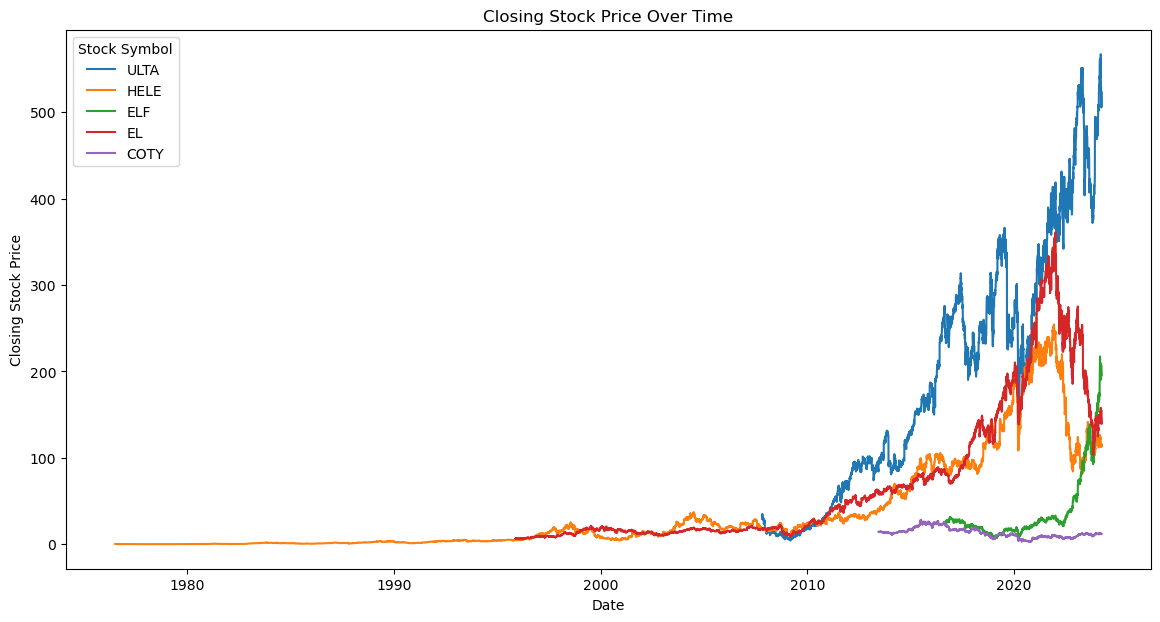

In [11]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', data=df, hue='stock_symbol')
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.legend(title='Stock Symbol')
plt.show()

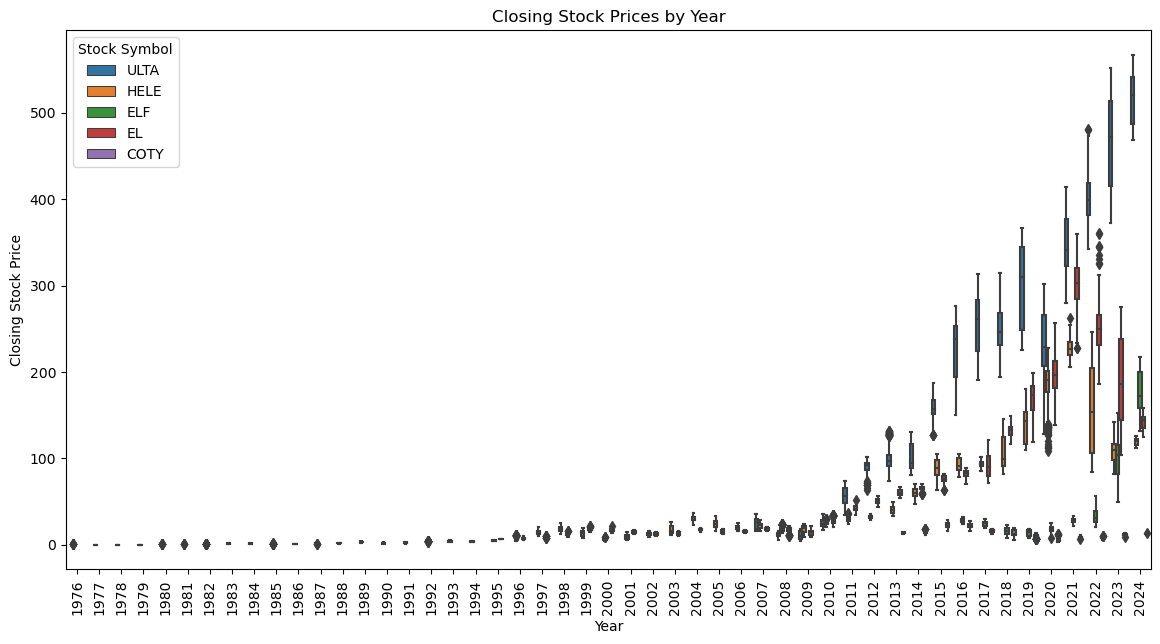

In [12]:
plt.figure(figsize=(14, 7))
df['year'] = df['Date'].dt.year
sns.boxplot(x='year', y='Close', data=df, hue='stock_symbol')
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.legend(title='Stock Symbol')
plt.xticks(rotation=90)
plt.show()

### Observations: 
From the plot, we can see that the closing and opening stock prices have increased over time, with some fluctuations while  hitting highs in more recent years. 

## III. Heatmap visualization
Next, we create a heatmap to visualize the correlation between the stock prices

In [13]:
cols = df.columns.values

In [14]:
cols= ['Date','Open', 'High', 'Low', 'Close', 
       'Volume', 'Dividends','Stock Splits', 'EMA_10','PSARl_0.02_0.2',
       'PSARs_0.02_0.2', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0','ISA_9',
       'ISB_26','ITS_9', 'IKS_26', 'ICS_26']

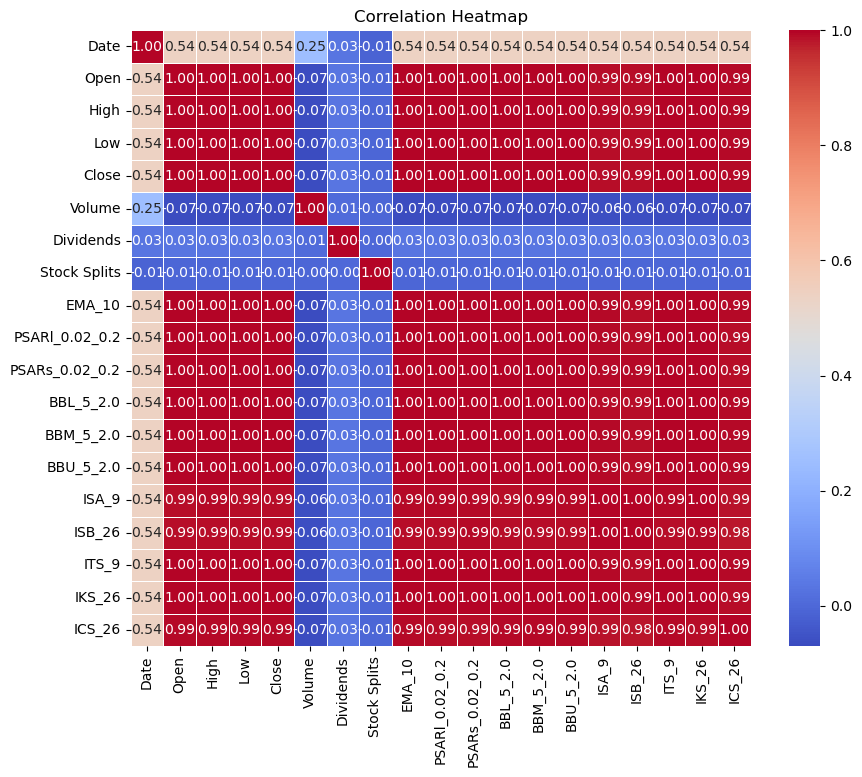

In [15]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

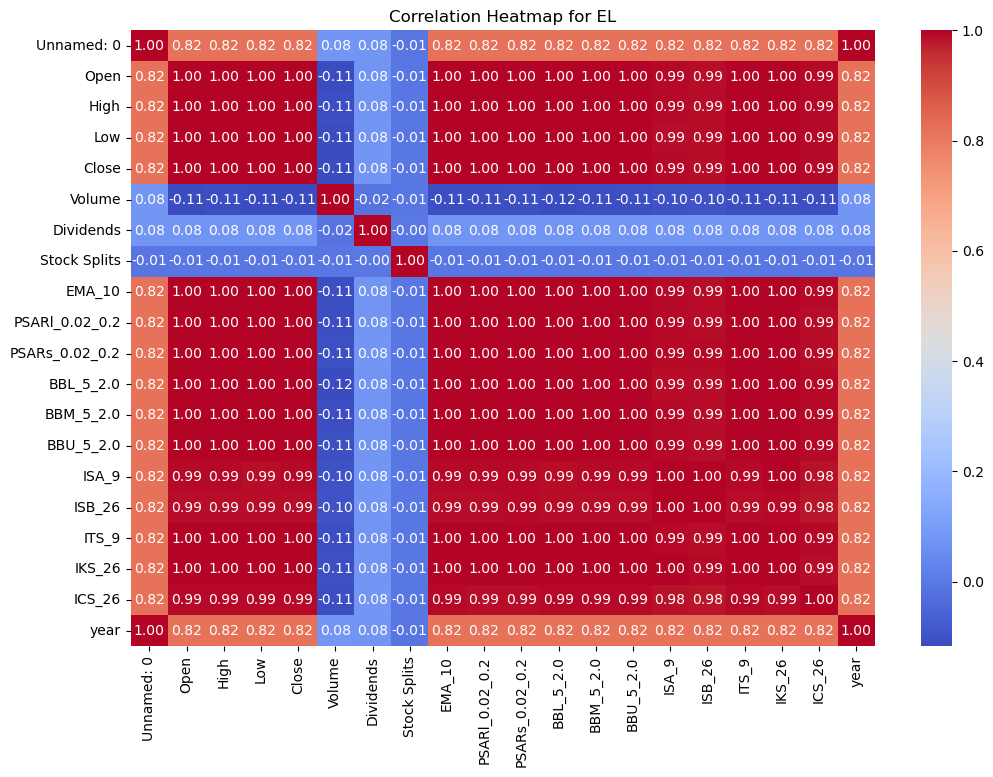

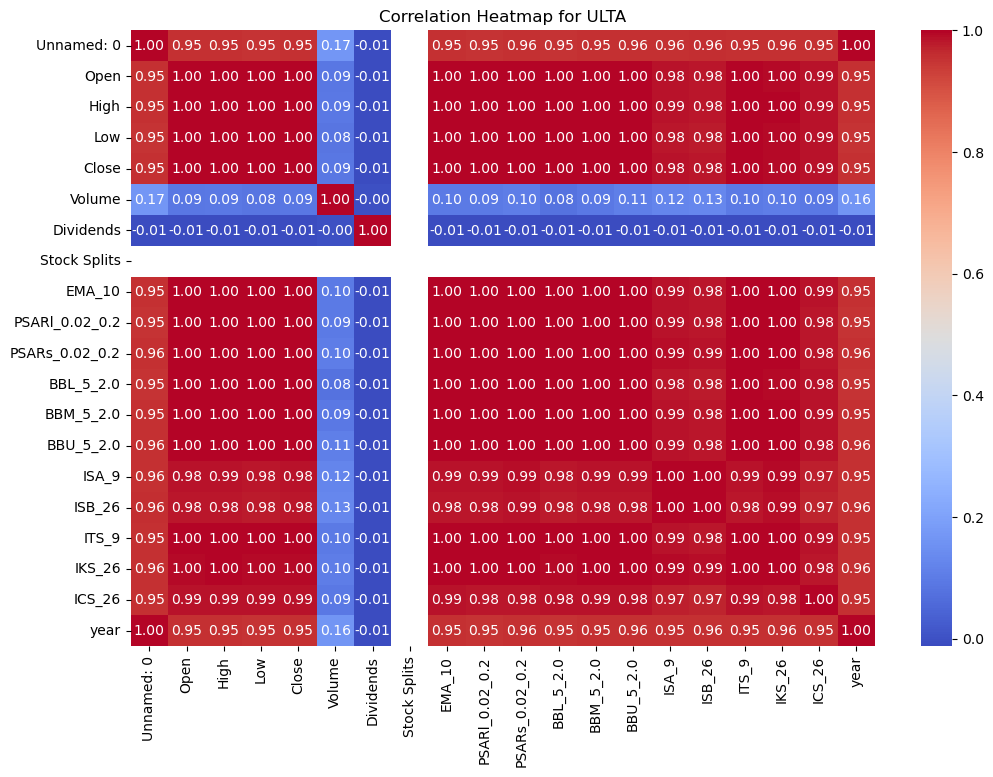

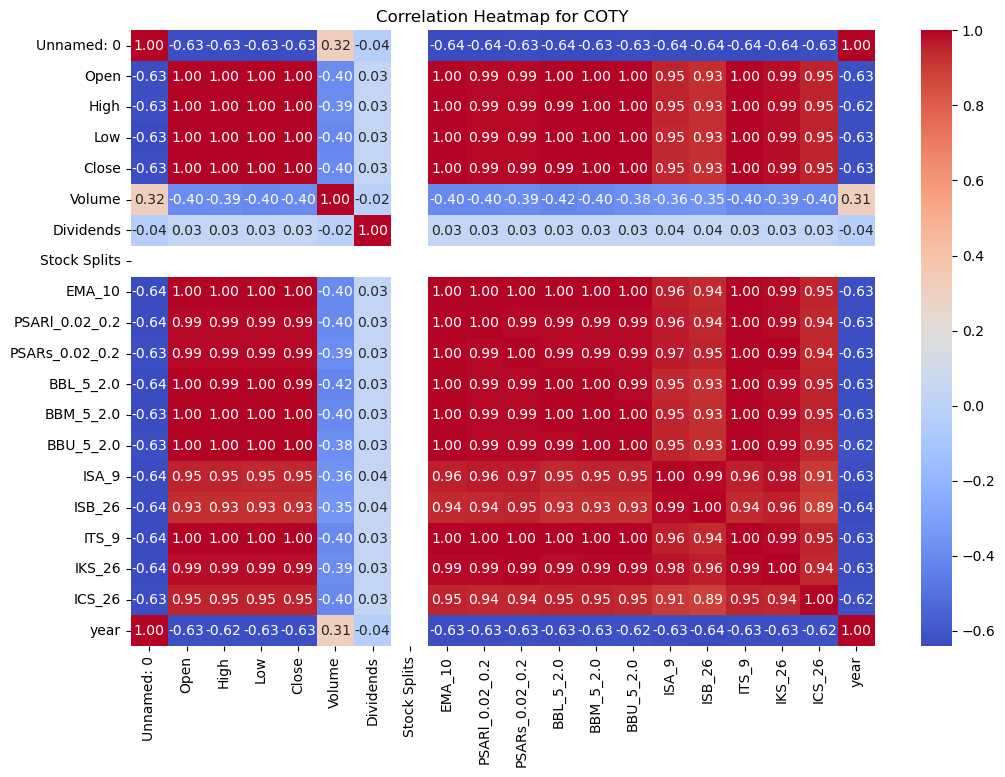

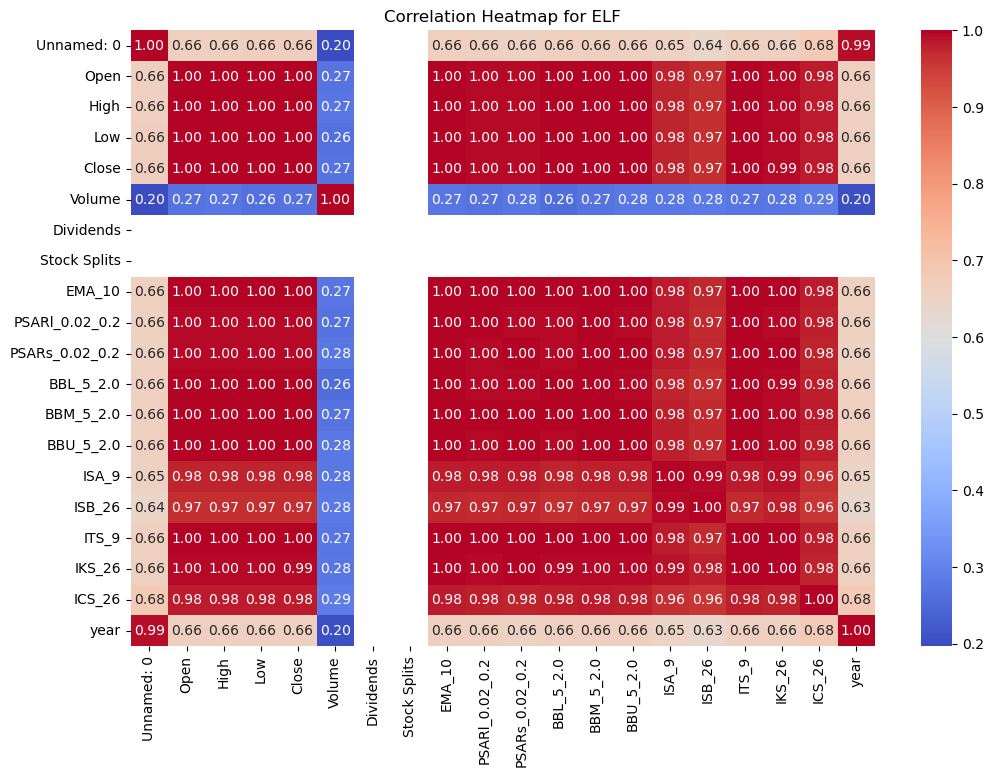

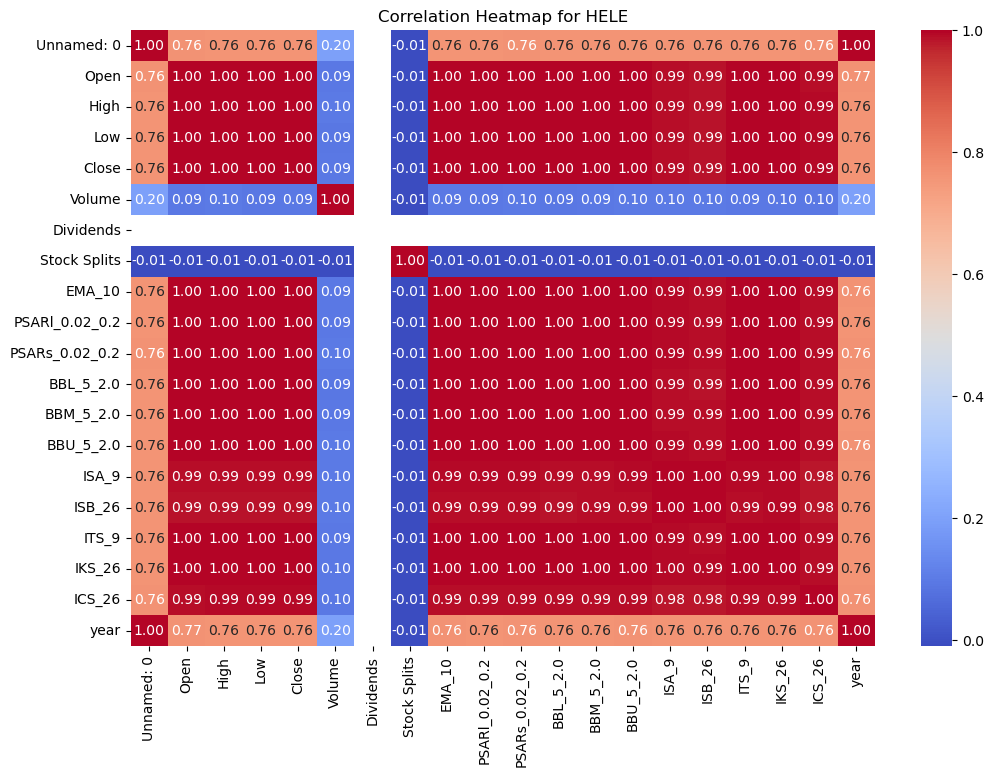

In [16]:
# Exclude non-numeric columns before calculating correlation
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Create separate correlation heatmaps for each stock symbol
stock_symbol = ['EL', 'ULTA', 'COTY', 'ELF', 'HELE']
for symbol in stock_symbol:
    df_stock = df_numeric[df['stock_symbol'] == symbol]
    
    correlation_matrix = df_stock.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f'Correlation Heatmap for {symbol}')
    plt.show()

### Observations:
From the heatmap, we can see that the opening and closing prices have a strong positive correlation, while the volume, dividends, and stock splits had much weaker positive correlations.

## IV: Visualization of the Target Variable

The Target variable in this case is the closing stock price. 

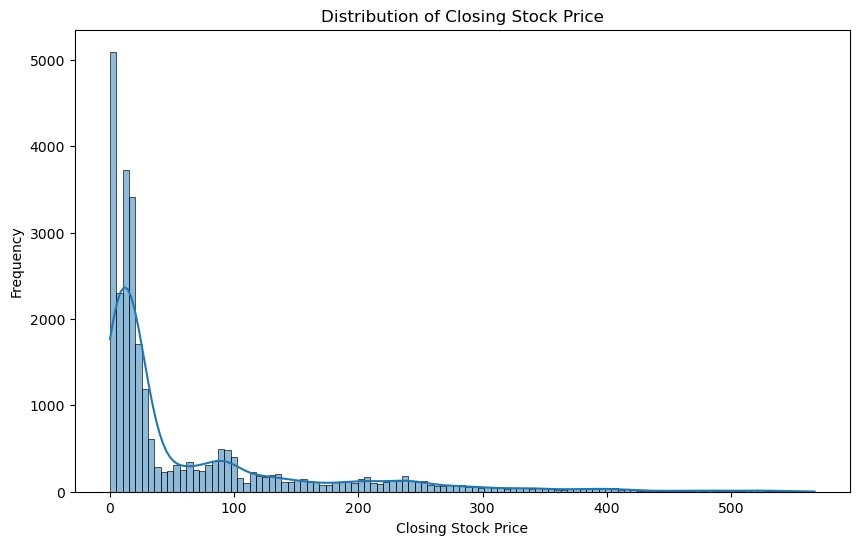

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

### To visualize the daily returns, we created a line chart to show the percentage change in price from one day to the next.

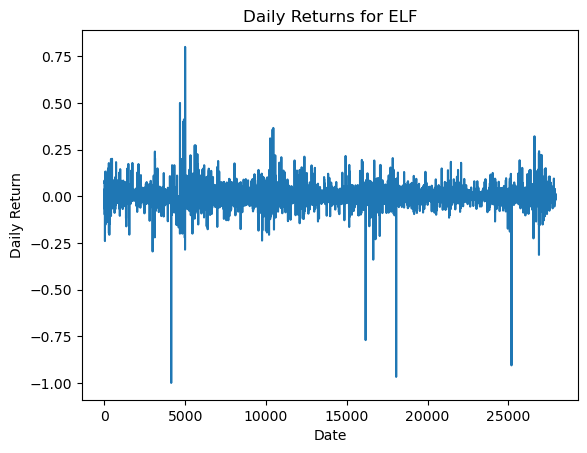

In [18]:
daily_returns = df['Close'].pct_change()

# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values)
plt.title('Daily Returns for ELF')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.

### We created a combination chart to visualize the stock prices with the volume traded

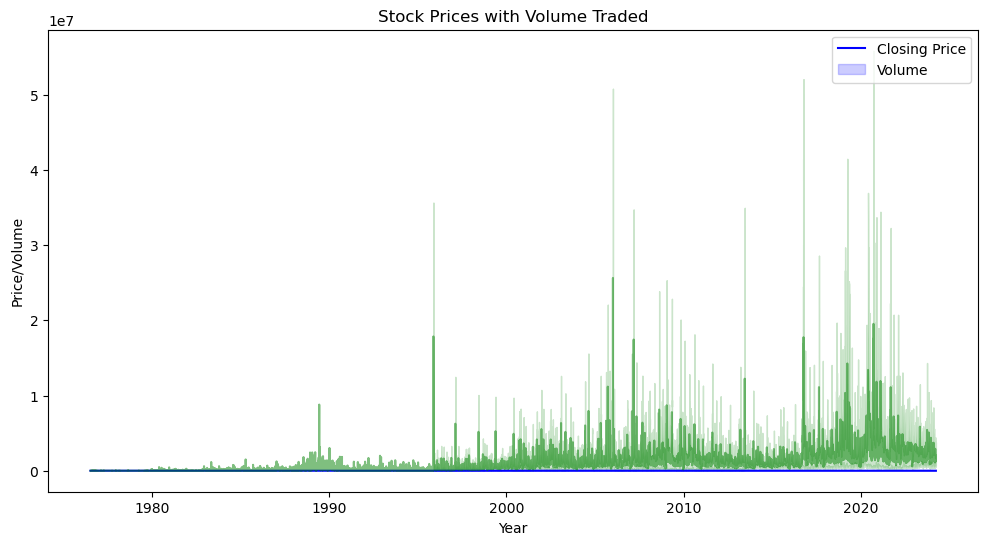

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=df, color='b')
sns.lineplot(x='Date', y='Volume', data=df, color='g', alpha=0.5)
plt.title('Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Closing Price', 'Volume'])
plt.show()